# Pré-processamento

## Base de Dados

### Pokemon.csv

Este conjunto de dados contém informações sobre 721 Pokémon, incluindo seu número, nome, primeiro e segundo tipo, e estatísticas básicas: HP, Ataque, Defesa, Ataque Especial, Defesa Especial e Velocidade.

Os dados são os seguintes:

- **#:** ID de cada Pokémon
- **Nome:** Nome de cada Pokémon
- **Tipo 1:** Cada Pokémon tem um tipo, que determina fraquezas/resistências a ataques. Por exemplo, um Pokémon do tipo Fogo pode ser fraco contra ataques do tipo Água.
- **Tipo 2:** Alguns Pokémon têm dois tipos, o que pode afetar suas fraquezas e resistências de maneiras diferentes.
- **Total:** soma de todas as estatísticas que vêm depois disso, um guia geral de quão forte é um Pokémon. Isso pode ajudar os treinadores a avaliar o potencial de combate de um Pokémon.
- **HP:** Pontos de vida, ou saúde, define quanto dano um Pokémon pode suportar antes de desmaiar. Quanto maior o HP, mais resistente o Pokémon é.
- **Ataque:** o modificador base para ataques normais (por exemplo, Arranhão, Soco). Um alto valor de Ataque indica que um Pokémon é mais eficaz em causar danos físicos.
- **Defesa:** a resistência base contra ataques normais. Um alto valor de Defesa significa que um Pokémon pode suportar melhor os ataques físicos.
- **Atq. Esp.:** ataque especial, o modificador base para ataques especiais (por exemplo, labareda, jato d'água). Este atributo influencia o poder dos ataques especiais de um Pokémon.
- **Def. Esp.:** a resistência base contra ataques especiais. Um alto valor de Defesa Especial indica que um Pokémon pode resistir melhor a ataques especiais.
- **Velocidade:** determina qual Pokémon ataca primeiro a cada rodada. Um Pokémon mais rápido geralmente tem a vantagem de atacar primeiro, o que pode ser crucial em batalhas.


In [16]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from scipy import stats

# Carregando dataset
df = pd.read_csv('./Pokemon.csv')

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Verificando os tipos dos atributos

In [17]:
# Tipos de dados
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## Avaliando os atributos numéricos utilizando as medidas de posição

In [33]:

for atributo, tipo in zip(df.columns, df.dtypes):
    #selecionando só os atributos numéricos e sem selecionar o id
    if tipo == 'int64' and atributo!='#':
     
        # Média Simples
        mediaSimples = np.mean(df[atributo])

        # Média Ponderada
        if atributo == 'Attack':
            mediaPonderada = np.average(df[atributo],weights=df['Sp. Atk'])

        # Média Ponderada
        if atributo == 'Defense':
            mediaPonderada = np.average(df[atributo],weights=df['Sp. Def'])

        # Mediana
        mediana = np.median(df[atributo])

        # Moda
        Moda = stats.mode(df[atributo],keepdims=True)        
        print('Atributo: '+ atributo)
        print('Média Simples: ',mediaSimples)
        if atributo=='Attack' or atributo=='Defense':
            print('Média Ponderada: ',mediaPonderada)
        print('Mediana: ',mediana)
        print('Moda - Elemento: ',Moda[0][0])
        print('Moda - Frequência: ',Moda[1][0])
        print("\n\n_________________________________________________________\n\n")




Atributo: Total
Média Simples:  435.1025
Mediana:  450.0
Moda - Elemento:  600
Moda - Frequência:  37


_________________________________________________________


Atributo: HP
Média Simples:  69.25875
Mediana:  65.0
Moda - Elemento:  60
Moda - Frequência:  67


_________________________________________________________


Atributo: Attack
Média Simples:  79.00125
Média Ponderada:  84.77495880252678
Mediana:  75.0
Moda - Elemento:  100
Moda - Frequência:  40


_________________________________________________________


Atributo: Defense
Média Simples:  73.8425
Média Ponderada:  79.99907861340009
Mediana:  70.0
Moda - Elemento:  70
Moda - Frequência:  54


_________________________________________________________


Atributo: Sp. Atk
Média Simples:  72.82
Mediana:  65.0
Moda - Elemento:  60
Moda - Frequência:  51


_________________________________________________________


Atributo: Sp. Def
Média Simples:  71.9025
Mediana:  70.0
Moda - Elemento:  80
Moda - Frequência:  52


______________

## Avaliando os atributos numéricos utilizando as medidas de dispersão

Atributo: Total
Primeiro quartil:  330.0
Segundo quartil:  450.0
Terceiro quartil:  515.0
Intervalo iterquartílico:  185.0
Variância:  14391.13090738423
Desvio Padrão:  119.96303975551899
Limite Inferior: 52.5
Outliers Inferior
Series([], Name: Total, dtype: int64)
Limite Superior: 792.5
Outliers Superiores
Series([], Name: Total, dtype: int64)


_________________________________________________________




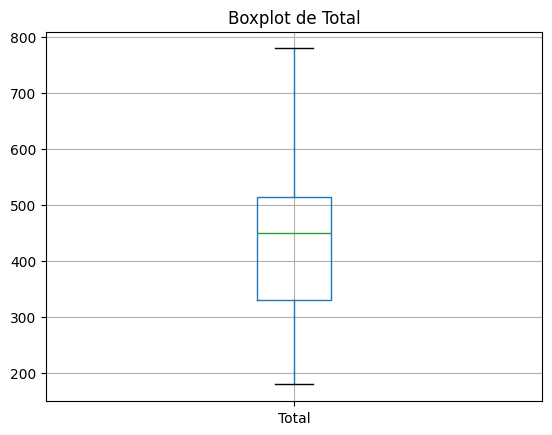

Atributo: HP
Primeiro quartil:  50.0
Segundo quartil:  65.0
Terceiro quartil:  80.0
Intervalo iterquartílico:  30.0
Variância:  652.0193225907384
Desvio Padrão:  25.53466903233207
Limite Inferior: 5.0
Outliers Inferior
316    1
Name: HP, dtype: int64
Limite Superior: 125.0
Outliers Superiores
45     140
121    250
142    130
145    130
155    160
185    125
217    190
261    255
313    150
321    144
350    130
351    170
473    150
495    135
544    150
545    150
655    165
710    125
711    125
712    125
792    126
793    126
Name: HP, dtype: int64


_________________________________________________________




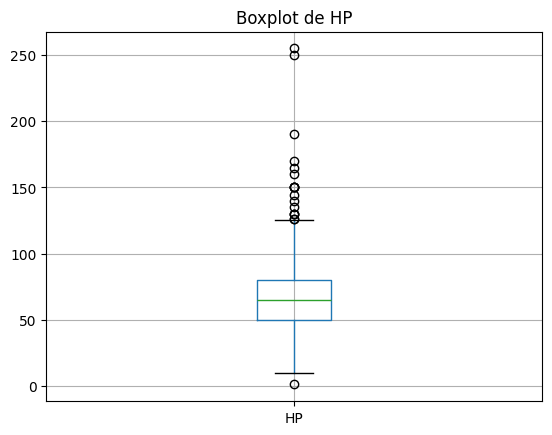

Atributo: Attack
Primeiro quartil:  55.0
Segundo quartil:  75.0
Terceiro quartil:  100.0
Intervalo iterquartílico:  45.0
Variância:  1053.4805991864832
Desvio Padrão:  32.45736586949845
Limite Inferior: -12.5
Outliers Inferior
Series([], Name: Attack, dtype: int64)
Limite Superior: 167.5
Outliers Superiores
163    190
232    185
424    180
426    180
429    180
494    170
711    170
Name: Attack, dtype: int64


_________________________________________________________




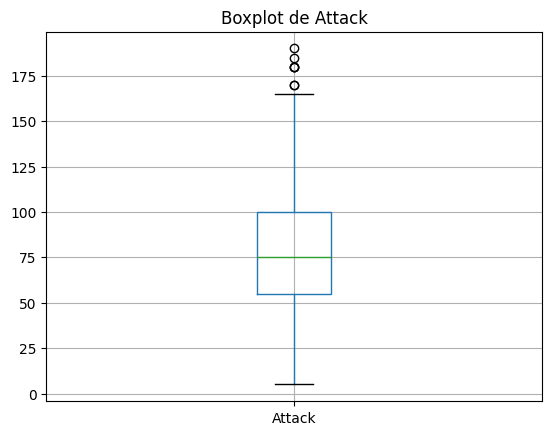

Atributo: Defense
Primeiro quartil:  50.0
Segundo quartil:  70.0
Terceiro quartil:  90.0
Intervalo iterquartílico:  40.0
Variância:  972.4107071339174
Desvio Padrão:  31.183500559332934
Limite Inferior: -10.0
Outliers Inferior
Series([], Name: Defense, dtype: int64)
Limite Superior: 150.0
Outliers Superiores
87     180
98     180
103    160
223    200
224    230
230    230
268    150
332    180
333    230
413    150
414    200
416    150
424    160
430    160
456    168
749    150
751    150
773    150
789    184
795    150
Name: Defense, dtype: int64


_________________________________________________________




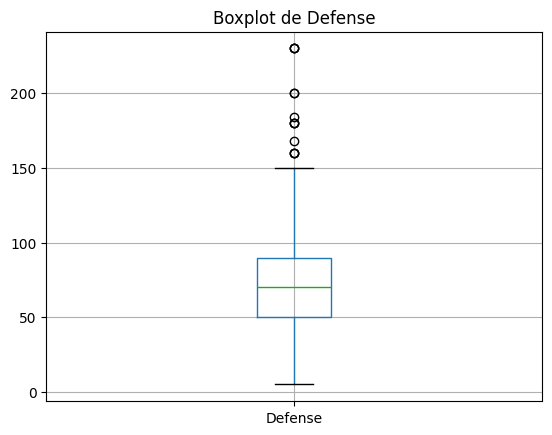

Atributo: Sp. Atk
Primeiro quartil:  49.75
Segundo quartil:  65.0
Terceiro quartil:  95.0
Intervalo iterquartílico:  45.25
Variância:  1070.748535669587
Desvio Padrão:  32.7222941688016
Limite Inferior: -18.125
Outliers Inferior
Series([], Name: Sp. Atk, dtype: int64)
Limite Superior: 162.875
Outliers Superiores
71     175
102    170
164    194
196    165
306    165
422    180
426    180
429    180
712    170
798    170
Name: Sp. Atk, dtype: int64


_________________________________________________________




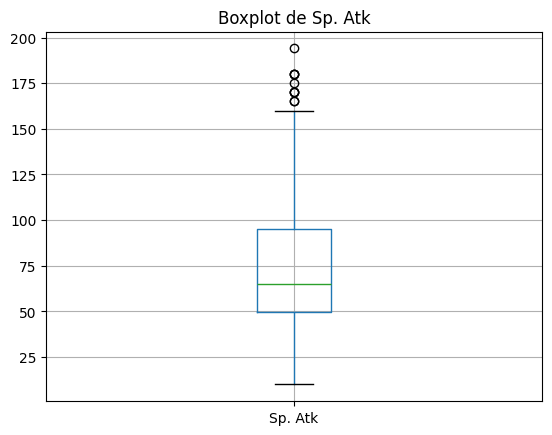

Atributo: Sp. Def
Primeiro quartil:  50.0
Segundo quartil:  70.0
Terceiro quartil:  90.0
Intervalo iterquartílico:  40.0
Variância:  774.4485544430538
Desvio Padrão:  27.82891579711746
Limite Inferior: -10.0
Outliers Inferior
Series([], Name: Sp. Def, dtype: int64)
Limite Superior: 150.0
Outliers Superiores
230    230
269    154
270    154
415    200
416    150
418    150
422    160
430    160
528    150
739    154
751    150
773    150
776    150
795    150
Name: Sp. Def, dtype: int64


_________________________________________________________




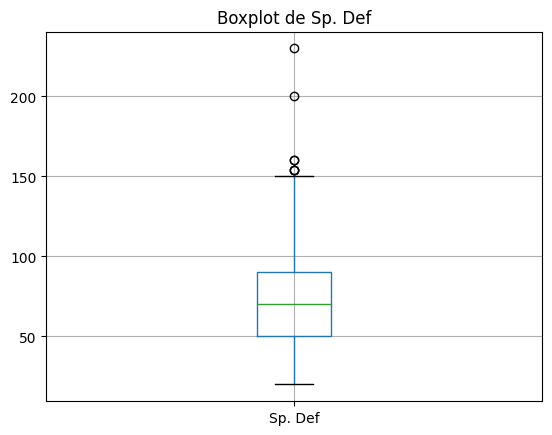

Atributo: Speed
Primeiro quartil:  45.0
Segundo quartil:  65.0
Terceiro quartil:  90.0
Intervalo iterquartílico:  45.0
Variância:  844.5111326658323
Desvio Padrão:  29.060473717161464
Limite Inferior: -22.5
Outliers Inferior
Series([], Name: Speed, dtype: int64)
Limite Superior: 157.5
Outliers Superiores
315    160
431    180
Name: Speed, dtype: int64


_________________________________________________________




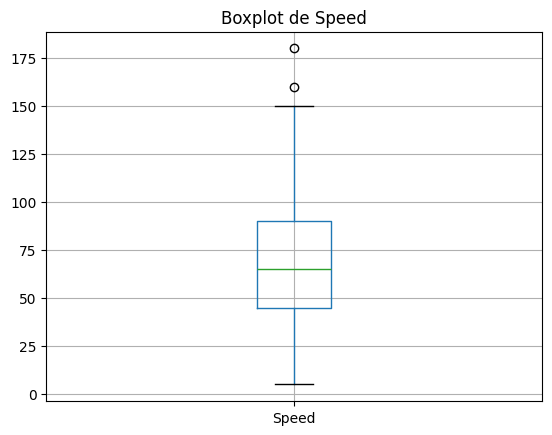

Atributo: Generation
Primeiro quartil:  2.0
Segundo quartil:  3.0
Terceiro quartil:  5.0
Intervalo iterquartílico:  3.0
Variância:  2.7598857947434294
Desvio Padrão:  1.6612904004849451
Limite Inferior: -2.5
Outliers Inferior
Series([], Name: Generation, dtype: int64)
Limite Superior: 9.5
Outliers Superiores
Series([], Name: Generation, dtype: int64)


_________________________________________________________




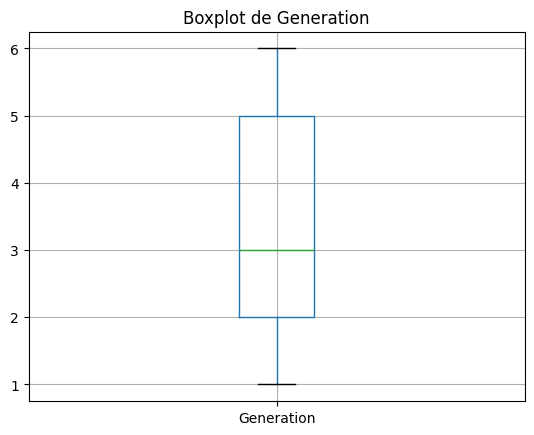

In [40]:
from scipy.stats import iqr
import matplotlib.pyplot as plt
for atributo, tipo in zip(df.columns, df.dtypes):
    #selecionando só os atributos numéricos e sem selecionar o id
    if tipo == 'int64' and atributo!='#':
     
        Q1df = df[atributo].quantile(.25)
        Q2df = df[atributo].quantile(.5)
        Q3df = df[atributo].quantile(.75)
        IQR=Q3df - Q1df
        # Limite Inferior
        Inferior = Q1df-1.5*IQR
       

        # Outliers - Inferior
        outlierInf = df.loc[df[atributo]<= Inferior]
        indicesOutlierInf = outlierInf.index  


        # Limite Superior
        Superior = Q3df+1.5*IQR
       

        # Outliers - Superior
        outlierSup = df.loc[df[atributo]>= Superior]
        indicesOutlierSup = outlierSup.index  
        variancia = df[atributo].var()
        desvio = df[atributo].std()

        print('Atributo: '+ atributo)
        print('Primeiro quartil: ',Q1df)
        print('Segundo quartil: ',Q2df)
        print('Terceiro quartil: ',Q3df)
        print('Intervalo iterquartílico: ',IQR)
        print('Variância: ',variancia)
        print('Desvio Padrão: ',desvio)
        print("Limite Inferior:",Inferior)
        print('Outliers Inferior')
        print(df[atributo].loc[indicesOutlierInf])
        print("Limite Superior:",Superior)
        print('Outliers Superiores')
        print(df[atributo].loc[indicesOutlierSup]) 
        print("\n\n_________________________________________________________\n\n")
        
        df.boxplot(column=[atributo])
        plt.title(f'Boxplot de {atributo}')
        plt.show() 

## Removendo os outliners

In [52]:
def remove_outliers_iqr(df):
    df_sem_outliers = pd.DataFrame()
    for coluna, tipo in zip(df.columns, df.dtypes):
        # Selecionando só os atributos numéricos e sem selecionar o id
        if tipo == 'int64' and coluna != '#':
            Q1 = df[coluna].quantile(0.25)
            Q3 = df[coluna].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            df_sem_outliers[coluna] = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)][coluna]
    return df_sem_outliers



Atributo: Total
Primeiro quartil:  330.0
Segundo quartil:  450.0
Terceiro quartil:  515.0
Intervalo iterquartílico:  185.0
Variância:  14391.13090738423
Desvio Padrão:  119.96303975551899
Limite Inferior: 52.5
Outliers Inferior
Series([], Name: Total, dtype: int64)
Limite Superior: 792.5
Outliers Superiores
Series([], Name: Total, dtype: int64)


_________________________________________________________




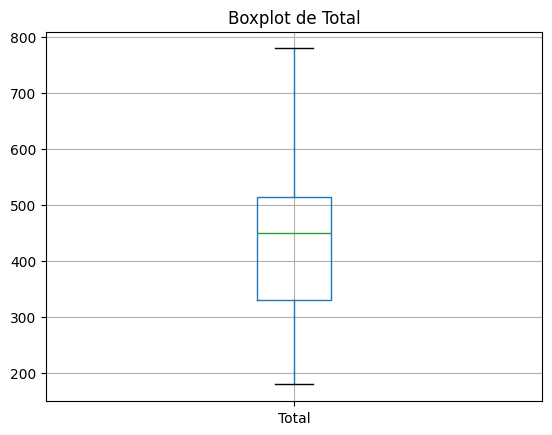

Atributo: HP
Primeiro quartil:  50.0
Segundo quartil:  65.0
Terceiro quartil:  80.0
Intervalo iterquartílico:  30.0
Variância:  442.93774253915103
Desvio Padrão:  21.04608615726808
Limite Inferior: 5.0
Outliers Inferior
Series([], Name: HP, dtype: float64)
Limite Superior: 125.0
Outliers Superiores
Series([], Name: HP, dtype: float64)


_________________________________________________________




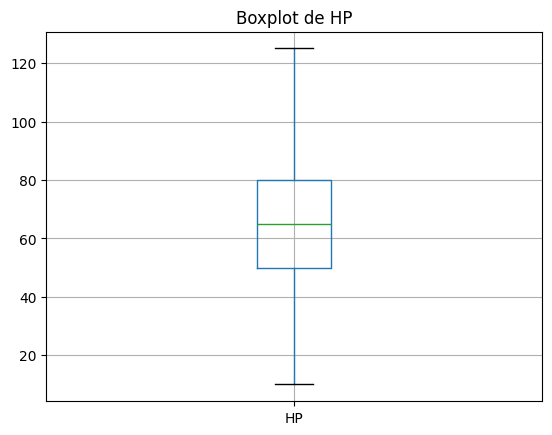

Atributo: Attack
Primeiro quartil:  55.0
Segundo quartil:  75.0
Terceiro quartil:  100.0
Intervalo iterquartílico:  45.0
Variância:  972.7137962219929
Desvio Padrão:  31.18835994761496
Limite Inferior: -12.5
Outliers Inferior
Series([], Name: Attack, dtype: float64)
Limite Superior: 167.5
Outliers Superiores
Series([], Name: Attack, dtype: float64)


_________________________________________________________




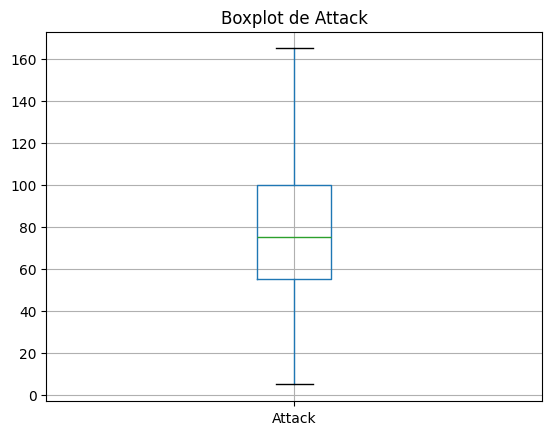

Atributo: Defense
Primeiro quartil:  50.0
Segundo quartil:  70.0
Terceiro quartil:  90.0
Intervalo iterquartílico:  40.0
Variância:  753.2119136993965
Desvio Padrão:  27.44470647865261
Limite Inferior: -10.0
Outliers Inferior
Series([], Name: Defense, dtype: float64)
Limite Superior: 150.0
Outliers Superiores
Series([], Name: Defense, dtype: float64)


_________________________________________________________




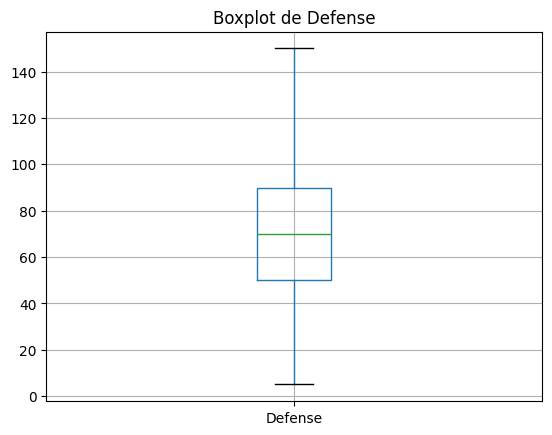

Atributo: Sp. Atk
Primeiro quartil:  48.25
Segundo quartil:  65.0
Terceiro quartil:  94.75
Intervalo iterquartílico:  46.5
Variância:  949.6766632975566
Desvio Padrão:  30.816824354523565
Limite Inferior: -21.5
Outliers Inferior
Series([], Name: Sp. Atk, dtype: float64)
Limite Superior: 164.5
Outliers Superiores
Series([], Name: Sp. Atk, dtype: float64)


_________________________________________________________




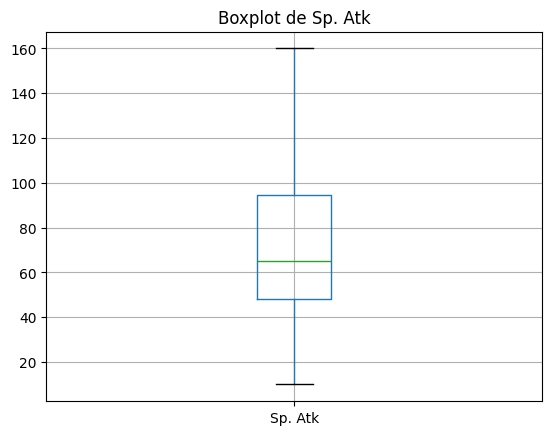

Atributo: Sp. Def
Primeiro quartil:  50.0
Segundo quartil:  70.0
Terceiro quartil:  90.0
Intervalo iterquartílico:  40.0
Variância:  683.0870431936006
Desvio Padrão:  26.135933945309866
Limite Inferior: -10.0
Outliers Inferior
Series([], Name: Sp. Def, dtype: float64)
Limite Superior: 150.0
Outliers Superiores
Series([], Name: Sp. Def, dtype: float64)


_________________________________________________________




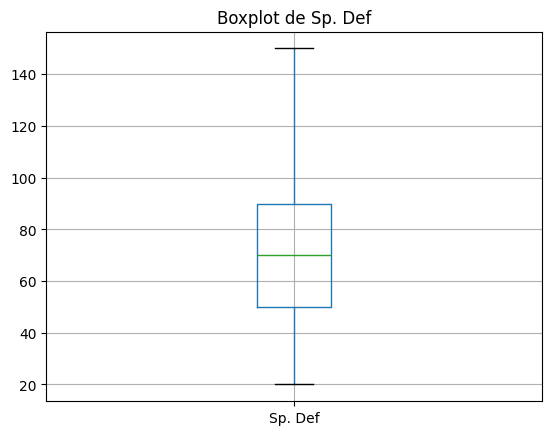

Atributo: Speed
Primeiro quartil:  45.0
Segundo quartil:  65.0
Terceiro quartil:  90.0
Intervalo iterquartílico:  45.0
Variância:  820.3482986009566
Desvio Padrão:  28.641723038269827
Limite Inferior: -22.5
Outliers Inferior
Series([], Name: Speed, dtype: float64)
Limite Superior: 157.5
Outliers Superiores
Series([], Name: Speed, dtype: float64)


_________________________________________________________




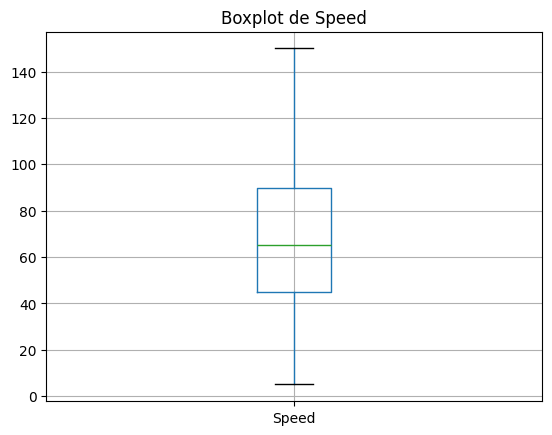

Atributo: Generation
Primeiro quartil:  2.0
Segundo quartil:  3.0
Terceiro quartil:  5.0
Intervalo iterquartílico:  3.0
Variância:  2.7598857947434294
Desvio Padrão:  1.6612904004849451
Limite Inferior: -2.5
Outliers Inferior
Series([], Name: Generation, dtype: int64)
Limite Superior: 9.5
Outliers Superiores
Series([], Name: Generation, dtype: int64)


_________________________________________________________




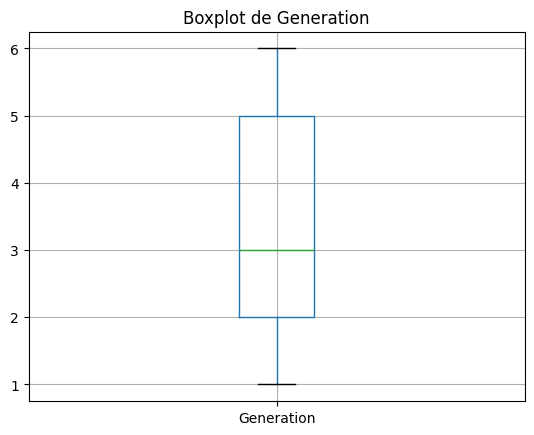

In [62]:
from scipy.stats import iqr
import matplotlib.pyplot as plt



df_outliners_off = remove_outliers_iqr(df)
for atributo, tipo in zip(df_outliners_off.columns, df_outliners_off.dtypes):
    #selecionando só os atributos numéricos e sem selecionar o id
 
     
        Q1df = df_outliners_off[atributo].quantile(.25)
        Q2df = df_outliners_off[atributo].quantile(.5)
        Q3df = df_outliners_off[atributo].quantile(.75)
        IQR=Q3df - Q1df
        # Limite Inferior
        Inferior = Q1df-1.5*IQR
       

        # Outliers - Inferior
        outlierInf = df_outliners_off.loc[df_outliners_off[atributo]< Inferior]
        indicesOutlierInf = outlierInf.index  


        # Limite Superior
        Superior = Q3df+1.5*IQR
       

        # Outliers - Superior
        outlierSup = df_outliners_off.loc[df_outliners_off[atributo]> Superior]
        indicesOutlierSup = outlierSup.index  
        variancia = df_outliners_off[atributo].var()
        desvio = df_outliners_off[atributo].std()

        print('Atributo: '+ atributo)
        print('Primeiro quartil: ',Q1df)
        print('Segundo quartil: ',Q2df)
        print('Terceiro quartil: ',Q3df)
        print('Intervalo iterquartílico: ',IQR)
        print('Variância: ',variancia)
        print('Desvio Padrão: ',desvio)
        print("Limite Inferior:",Inferior)
        print('Outliers Inferior')
        print(df_outliners_off[atributo].loc[indicesOutlierInf])
        print("Limite Superior:",Superior)
        print('Outliers Superiores')
        print(df_outliners_off[atributo].loc[indicesOutlierSup]) 
        print("\n\n_________________________________________________________\n\n")
        
        df_outliners_off.boxplot(column=[atributo])
        plt.title(f'Boxplot de {atributo}')
        plt.show() 

      




## se você remover os outliers, como isso afeta as medidas de posição e dispersão que você obteve ?

## Não existem atributos que possuem variância zero ou próxima de zero?

verificação se existem dados duplicados. 

In [64]:
# Verificar dados duplicados
dados_duplicados = df.duplicated().sum()
if dados_duplicados:
    print(f"Existem {dados_duplicados} dados duplicados.")
else:
    print("Não existem dados duplicados.")

Não existem dados duplicados.


In [ ]:
 para os atributos categóricos, transforme estes atributos para as 3 formas de transformação

In [66]:
# Extraindo os valores únicos de um atributo
valores_unicos = df['Type 1'].unique()

# Exibindo os valores únicos
print(valores_unicos)
# Extraindo os valores únicos de um atributo
valores_unicos = df['Type 2'].unique()

# Exibindo os valores únicos
print(valores_unicos)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
